## Start analysis

Before, create the next folders:
  - "results"
    - "csv"
    - "images"
      - "paper"
      - "test"
      - "validation"

### Access to data

Lets import necesary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline


from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from statsmodels.tools.eval_measures import mse, rmse, meanabs, stde

import warnings
warnings.filterwarnings('ignore')

Lets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url = '/content/drive/Shareddrives/Inteligencia Artificial/Reto Bloque 2/Datasets/2012_2019_PlatteRiverWeir_features_merged_all.csv'
df = pd.read_csv(url)
df.head()

SensorTime          CaptureTime  \
0  2012-06-09 13:15:00  2012-06-09T13:09:07   
1  2012-06-09 13:15:00  2012-06-09T13:10:29   
2  2012-06-09 13:45:00  2012-06-09T13:44:01   
3  2012-06-09 14:45:00  2012-06-09T14:44:30   
4  2012-06-09 15:45:00  2012-06-09T15:44:59   

                                 Filename  Agency   SiteNumber  TimeZone  \
0  StateLineWeir_20120609_Farrell_001.jpg    USGS      6674500       MDT   
1  StateLineWeir_20120609_Farrell_002.jpg    USGS      6674500       MDT   
2  StateLineWeir_20120609_Farrell_003.jpg    USGS      6674500       MDT   
3  StateLineWeir_20120609_Farrell_004.jpg    USGS      6674500       MDT   
4  StateLineWeir_20120609_Farrell_005.jpg    USGS      6674500       MDT   

    Stage   Discharge        CalcTimestamp   width  ...   WeirPt2X   WeirPt2Y  \
0    2.99       916.0  2020-03-11T16:58:28    4288  ...         -1         -1   
1    2.99       916.0  2020-03-11T16:58:33    4288  ...         -1         -1   
2    2.96       873.0  2020-03-11T16:58:40    4288  ...         -1         -1   
3    2.94       846.0  2020-03-11T16:58:47    4288  ...         -1         -1   
4    2.94       846.0  2020-03-11T16:58:55    4288  ...         -1         -1   

    WwRawLineMin   WwRawLineMax   WwRawLineMean   WwRawLineSigma  \
0            0.0            0.0             0.0              0.0   
1            0.0            0.0             0.0              0.0   
2            0.0            0.0             0.0              0.0   
3            0.0            0.0             0.0              0.0   
4            0.0            0.0             0.0              0.0   

    WwCurveLineMin   WwCurveLineMax   WwCurveLineMean   WwCurveLineSigma  
0              0.0              0.0               0.0                0.0  
1              0.0              0.0               0.0                0.0  
2              0.0              0.0               0.0                0.0  
3              0.0              0.0               0.0                0.0  
4              0.0              0.0               0.0                0.0  

[5 rows x 59 columns]

### Describe data

#### Column names

In [ ]:
df.columns.tolist()

['SensorTime',
 ' CaptureTime',
 ' Filename',
 ' Agency',
 ' SiteNumber',
 ' TimeZone',
 ' Stage',
 ' Discharge',
 ' CalcTimestamp',
 ' width',
 ' height',
 ' exposure',
 ' fNumber',
 ' isoSpeed',
 ' shutterSpeed',
 ' grayMean',
 ' graySigma',
 ' entropyMean',
 ' entropySigma',
 ' hMean',
 ' hSigma',
 ' sMean',
 ' sSigma',
 ' vMean',
 ' vSigma',
 ' areaFeatCount',
 ' grayMean 0',
 ' graySigma 0',
 ' entropyMean 0',
 ' entropySigma 0',
 ' hMean 0',
 ' hSigma 0',
 ' sMean 0',
 ' sSigma 0',
 ' vMean 0',
 ' vSigma 0',
 ' grayMean 1',
 ' graySigma 1',
 ' entropyMean 1',
 ' entropySigma 1',
 ' hMean 1',
 ' hSigma 1',
 ' sMean 1',
 ' sSigma 1',
 ' vMean 1',
 ' vSigma 1',
 ' WeirAngle',
 ' WeirPt1X',
 ' WeirPt1Y',
 ' WeirPt2X',
 ' WeirPt2Y',
 ' WwRawLineMin',
 ' WwRawLineMax',
 ' WwRawLineMean',
 ' WwRawLineSigma',
 ' WwCurveLineMin',
 ' WwCurveLineMax',
 ' WwCurveLineMean',
 ' WwCurveLineSigma']

#### Are there any null values?

In [ ]:
df.isnull().sum()

SensorTime           0
 CaptureTime         0
 Filename            0
 Agency              0
 SiteNumber          0
 TimeZone            0
 Stage               0
 Discharge           0
 CalcTimestamp       0
 width               0
 height              0
 exposure            0
 fNumber             0
 isoSpeed            0
 shutterSpeed        0
 grayMean            0
 graySigma           0
 entropyMean         0
 entropySigma        0
 hMean               0
 hSigma              0
 sMean               0
 sSigma              0
 vMean               0
 vSigma              0
 areaFeatCount       0
 grayMean 0          0
 graySigma 0         0
 entropyMean 0       0
 entropySigma 0      0
 hMean 0             0
 hSigma 0            0
 sMean 0             0
 sSigma 0            0
 vMean 0             0
 vSigma 0            0
 grayMean 1          0
 graySigma 1         0
 entropyMean 1       0
 entropySigma 1      0
 hMean 1             0
 hSigma 1            0
 sMean 1             0
 sSigma 1  

#### Pearson correlation

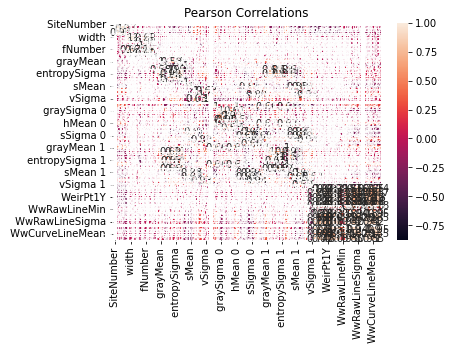

In [ ]:
ax = sns.heatmap(df.corr(), annot=True).set(title='Pearson Correlations');

### Preprocessing the data


New DataFrame with numeric values (separating stage and discharge -dependent variables-)

In [ ]:
df_new = df.drop(columns = ['SensorTime', ' CaptureTime', ' Filename', ' Agency', ' TimeZone', ' CalcTimestamp', ' Stage', ' Discharge'])
df_stage = df[[' Stage']]
df_discharge = df[[' Discharge']]

In [ ]:
df_new.columns.tolist()

[' SiteNumber',
 ' width',
 ' height',
 ' exposure',
 ' fNumber',
 ' isoSpeed',
 ' shutterSpeed',
 ' grayMean',
 ' graySigma',
 ' entropyMean',
 ' entropySigma',
 ' hMean',
 ' hSigma',
 ' sMean',
 ' sSigma',
 ' vMean',
 ' vSigma',
 ' areaFeatCount',
 ' grayMean 0',
 ' graySigma 0',
 ' entropyMean 0',
 ' entropySigma 0',
 ' hMean 0',
 ' hSigma 0',
 ' sMean 0',
 ' sSigma 0',
 ' vMean 0',
 ' vSigma 0',
 ' grayMean 1',
 ' graySigma 1',
 ' entropyMean 1',
 ' entropySigma 1',
 ' hMean 1',
 ' hSigma 1',
 ' sMean 1',
 ' sSigma 1',
 ' vMean 1',
 ' vSigma 1',
 ' WeirAngle',
 ' WeirPt1X',
 ' WeirPt1Y',
 ' WeirPt2X',
 ' WeirPt2Y',
 ' WwRawLineMin',
 ' WwRawLineMax',
 ' WwRawLineMean',
 ' WwRawLineSigma',
 ' WwCurveLineMin',
 ' WwCurveLineMax',
 ' WwCurveLineMean',
 ' WwCurveLineSigma']

In [ ]:
df_stage.columns.tolist()

[' Stage']

In [ ]:
df_discharge.columns.tolist()

[' Discharge']

Lets scale independent variables

In [ ]:
std_scl = StandardScaler()
rbt_scl = RobustScaler()
mmx_scl = MinMaxScaler()

X = df_new
df_new_std = pd.DataFrame(std_scl.fit_transform(df_new))
df_new_rbt = pd.DataFrame(rbt_scl.fit_transform(df_new))
df_new_mmx = pd.DataFrame(mmx_scl.fit_transform(df_new))

print('X:', X.shape)
print('Standard X:', df_new_std.shape)
print('Robust X:', df_new_rbt.shape)
print('MinMax X:', df_new_mmx.shape)

X: (42059, 51)
Standard X: (42059, 51)
Robust X: (42059, 51)
MinMax X: (42059, 51)


In [ ]:
def RunModels(df_x, df_y):
  # Split   60% - Train    20% - Test    20% - Validate
  x_train, x_test, y1_train, y1_test = train_test_split(df_x, df_y, test_size=0.4, random_state=1)
  x_test, x_val, y1_test, y1_val = train_test_split(x_test, y1_test, test_size=0.5, random_state=1)

  # MLP Model
  reg = MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1, solver='adam')
  reg.fit(x_train, y1_train)

  y_mlp_test_pred = pd.DataFrame(reg.predict(x_test))
  y_mlp_val_pred = pd.DataFrame(reg.predict(x_val))

  MLP_model_results = {
          "Test":{
            "MAE": meanabs(y_mlp_test_pred, y1_test)[0],
            "MSE": mse(y_mlp_test_pred, y1_test)[0],
            "RMSE": rmse(y_mlp_test_pred, y1_test)[0],
            "R^2": r2_score(y1_test, y_mlp_test_pred),
            "Standard Error": stde(y_mlp_test_pred, y1_test, ddof = 52)[0],
            "Y test": y1_test,
            "Y test predicted": y_mlp_test_pred
          },
          "Validation":{
            "MAE": meanabs(y_mlp_val_pred, y1_val)[0],
            "MSE": mse(y_mlp_val_pred, y1_val)[0],
            "RMSE": rmse(y_mlp_val_pred, y1_val)[0],
            "R^2": r2_score(y1_val, y_mlp_val_pred),
            "Standard Error": stde(y_mlp_val_pred, y1_val, ddof = 52)[0],
            "Y validation": y1_val,
            "Y validation predicted": y_mlp_val_pred
          }
  }


  # RandomForest Model
  rdm = RandomForestRegressor(n_estimators=20, random_state=0)
  rdm.fit(x_train, y1_train)

  y_rdm_test_pred = pd.DataFrame(rdm.predict(x_test))
  y_rdm_val_pred = pd.DataFrame(rdm.predict(x_val))
  
  randomForest_model_results = {
          "Test":{
            "MAE": meanabs(y_rdm_test_pred, y1_test)[0],
            "MSE": mse(y_rdm_test_pred, y1_test)[0],
            "RMSE": rmse(y_rdm_test_pred, y1_test)[0],
            "R^2": r2_score(y1_test, y_rdm_test_pred),
            "Standard Error": stde(y_rdm_test_pred, y1_test, ddof = 52)[0],
            "Y test": y1_test,
            "Y test predicted": y_rdm_test_pred
          },
          "Validation":{
            "MAE": meanabs(y_rdm_val_pred, y1_val)[0],
            "MSE": mse(y_rdm_val_pred, y1_val)[0],
            "RMSE": rmse(y_rdm_val_pred, y1_val)[0],
            "R^2": r2_score(y1_val, y_rdm_val_pred),
            "Standard Error": stde(y_rdm_val_pred, y1_val, ddof = 52)[0],
            "Y validation": y1_val,
            "Y validation predicted": y_rdm_val_pred
          }
  }

  # SVR Model
  regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
  regr.fit(x_train, y1_train)

  y_regr_test_pred = pd.DataFrame(regr.predict(x_test))
  y_regr_val_pred = pd.DataFrame(regr.predict(x_val))

  SVR_model_results = {
          "Test":{
            "MAE": meanabs(y_regr_test_pred, y1_test)[0],
            "MSE": mse(y_regr_test_pred, y1_test)[0],
            "RMSE": rmse(y_regr_test_pred, y1_test)[0],
            "R^2": r2_score(y1_test, y_regr_test_pred),
            "Standard Error": stde(y_regr_test_pred, y1_test, ddof = 52)[0],
            "Y test": y1_test,
            "Y test predicted": y_regr_test_pred
          },
          "Validation":{
            "MAE": meanabs(y_regr_val_pred, y1_val)[0],
            "MSE": mse(y_regr_val_pred, y1_val)[0],
            "RMSE": rmse(y_regr_val_pred, y1_val)[0],
            "R^2": r2_score(y1_val, y_regr_val_pred),
            "Standard Error": stde(y_regr_val_pred, y1_val, ddof = 52)[0],
            "Y validation": y1_val,
            "Y validation predicted": y_regr_val_pred
          }
  }


  
  data = {"MLP Model": MLP_model_results, "Random Forest Model": randomForest_model_results, "SVR Model": SVR_model_results}
  return data

### Paper Variables:


#### Function

In [ ]:
def RunPaperModels(df_x, df_y):
  # Split   70% - Train    30% - Test
  x_train, x_test, y1_train, y1_test = train_test_split(df_new, df_stage, test_size=0.7, random_state=1)

  # MLP Model
  reg = MLPRegressor(hidden_layer_sizes=(5, 2), random_state=1, solver='adam')
  reg.fit(x_train, y1_train)

  y_mlp_test_pred = pd.DataFrame(reg.predict(x_test))

  MLP_model_results = {
          "Test":{ 
            "MAE": meanabs(y_mlp_test_pred, y1_test)[0],
            "MSE": mse(y_mlp_test_pred, y1_test)[0],
            "RMSE": rmse(y_mlp_test_pred, y1_test)[0],
            "R^2": r2_score(y1_test, y_mlp_test_pred),
            "Standard Error": stde(y_mlp_test_pred, y1_test, ddof = 52)[0],
            "Y test": y1_test,
            "Y test predicted": y_mlp_test_pred
          }
  }

  #fig, ax = plt.subplots()
  #X = np.linspace(1, 100, 100)
  #ax.plot(X, y1_test[:100], X, y_mlp_test_pred[:100])
  #fig


  # RandomForest Model
  rdm = RandomForestRegressor(n_estimators=20, random_state=0)
  rdm.fit(x_train, y1_train)

  y_rdm_test_pred = pd.DataFrame(rdm.predict(x_test))
  
  randomForest_model_results = {
          "Test":{
            "MAE": meanabs(y_rdm_test_pred, y1_test)[0],
            "MSE": mse(y_rdm_test_pred, y1_test)[0],
            "RMSE": rmse(y_rdm_test_pred, y1_test)[0],
            "R^2": r2_score(y1_test, y_rdm_test_pred),
            "Standard Error": stde(y_rdm_test_pred, y1_test, ddof = 52)[0],
            "Y test": y1_test,
            "Y test predicted": y_rdm_test_pred
        }
  }

#  fig, ax = plt.subplots()
#  X = np.linspace(0, 100, 1000)
#  ax.plot(X, y1_test[:1000], X, y_rdm_test_pred[:1000])
#  fig

  # SVR Model
  regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
  regr.fit(x_train, y1_train)

  y_regr_test_pred = pd.DataFrame(regr.predict(x_test))

  SVR_model_results = {
          "Test":{
            "MAE": meanabs(y_regr_test_pred, y1_test)[0],
            "MSE": mse(y_regr_test_pred, y1_test)[0],
            "RMSE": rmse(y_regr_test_pred, y1_test)[0],
            "R^2": r2_score(y1_test, y_regr_test_pred),
            "Standard Error": stde(y_regr_test_pred, y1_test, ddof = 52)[0],
            "Y test": y1_test,
            "Y test predicted": y_regr_test_pred
          }
  }

#  fig, ax = plt.subplots()
#  X = np.linspace(0, 100, 1000)
#  ax.plot(X, y1_test[:1000], X, y_regr_test_pred[:1000])
#  fig


  
  data = {"MLP Model": MLP_model_results, "Random Forest Model": randomForest_model_results, "SVR Model": SVR_model_results}
  return data

#### Run Models

In [ ]:
paperVariables = {"Stage": RunPaperModels(df_new, df_stage), 
                  "Discharge": RunPaperModels(df_new, df_discharge)
                 }

### Models with unscaled variables:

#### Normal variables

In [ ]:
normalVariables = {"Stage": RunModels(df_new, df_stage), 
                   "Discharge": RunModels(df_new, df_discharge)
                  }

#### PCA chosen variables

Text(0.5, 1.0, 'Components Number vs Explained Variance Percentage')

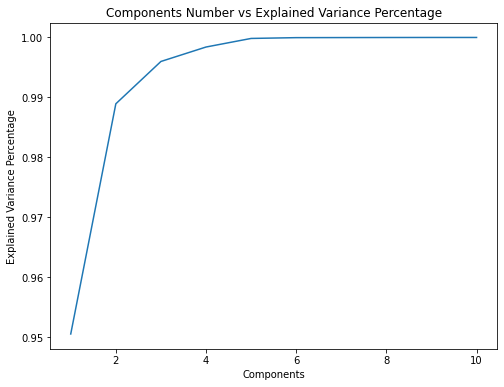

In [ ]:
pca = PCA(n_components = 10)
pca.fit(df_new)

#print("Components:")
#print(pca.components_)
#print("Explained Variance:")
#print(pca.explained_variance_)
#print("Explained Variance Percentage:")
#print(pca.explained_variance_ratio_) 

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
#print("Cumulative explained variance:\n", cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11, 1), cumulative_variance)
plt.xlabel("Components")
plt.ylabel("Explained Variance Percentage")
plt.title("Components Number vs Explained Variance Percentage")

In [ ]:
# Choose a components number
pca = PCA(n_components = 3)
pca.fit(df_new)

scores = pca.transform(df_new)
#print("New Variables (with pca):\n", scores)
df_new_pca = pd.DataFrame(scores)

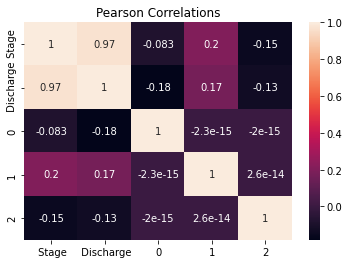

In [ ]:
result = pd.concat([df_stage, df_discharge, df_new_pca], axis=1)
ax = sns.heatmap(result.corr(), annot=True).set(title='Pearson Correlations');

In [ ]:
normalVariablesPCA = {"Stage": RunModels(df_new_pca, df_stage),
                      "Discharge": RunModels(df_new_pca, df_discharge)
                     }

### Models with standard scaled variables:

#### Standard scaled variables

In [ ]:
standardScaledVariables = {"Stage": RunModels(df_new_std, df_stage),
                           "Discharge": RunModels(df_new_std, df_discharge)
                          }

#### PCA chosen variables

Cumulative explained variance:
 [0.24227925 0.40863667 0.52683484 0.61514111 0.68931522 0.74487217
 0.78744934 0.81820788 0.84169474 0.86233399 0.88176179 0.89792372
 0.91174199 0.92403711 0.93454123]


Text(0.5, 1.0, 'Components Number vs Explained Variance Percentage')

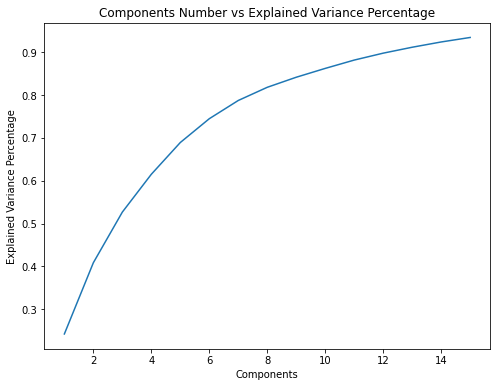

In [ ]:
pca = PCA(n_components = 15)
pca.fit(df_new_std)

#print("Components:")
#print(pca.components_)
#print("Explained Variance:")
#print(pca.explained_variance_)
#print("Explained Variance Percentage:")
#print(pca.explained_variance_ratio_) 

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:\n", cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 16, 1), cumulative_variance)
plt.xlabel("Components")
plt.ylabel("Explained Variance Percentage")
plt.title("Components Number vs Explained Variance Percentage")

In [ ]:
# Choose a components number
pca = PCA(n_components = 7)
pca.fit(df_new_std)

scores = pca.transform(df_new_std)
#print("New Variables (with pca):\n", scores)
df_new_std_pca = pd.DataFrame(scores)

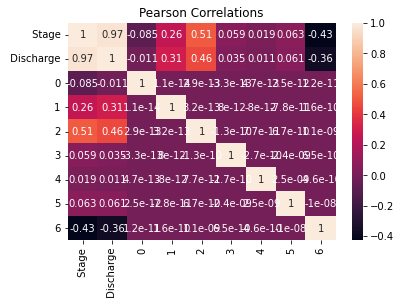

In [ ]:
result = pd.concat([df_stage, df_discharge, df_new_std_pca], axis=1)
ax = sns.heatmap(result.corr(), annot=True).set(title='Pearson Correlations');

In [ ]:
standardScaledVariablesPCA = {"Stage": RunModels(df_new_std_pca, df_stage),
                              "Discharge": RunModels(df_new_std_pca, df_discharge)
                             }

### Models with robust scaled variables:



#### Robust scaled variables

In [ ]:
robustScaledVariables = {"Stage": RunModels(df_new_rbt, df_stage),
                         "Discharge": RunModels(df_new_rbt, df_discharge)
                        }

#### PCA chosen variable

Cumulative explained variance:
 [0.86612619 0.99742755 0.99992961 0.99994549 0.99995904 0.99996923
 0.99997614 0.99998038 0.99998328 0.99998581]


Text(0.5, 1.0, 'Components Number vs Explained Variance Percentage')

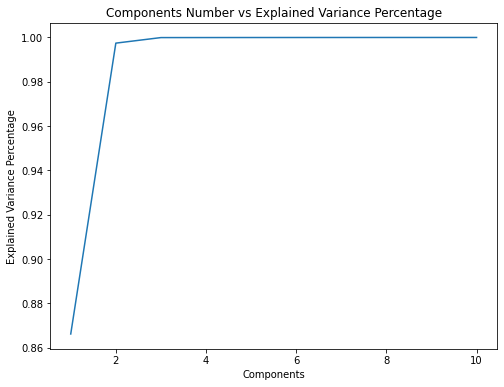

In [ ]:
pca = PCA(n_components = 10)
pca.fit(df_new_rbt)

#print("Components:")
#print(pca.components_)
#print("Explained Variance:")
#print(pca.explained_variance_)
#print("Explained Variance Percentage:")
#print(pca.explained_variance_ratio_) 

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative explained variance:\n", cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11, 1), cumulative_variance)
plt.xlabel("Components")
plt.ylabel("Explained Variance Percentage")
plt.title("Components Number vs Explained Variance Percentage")

In [ ]:
# Choose a components number
pca = PCA(n_components = 2)
pca.fit(df_new_rbt)

scores = pca.transform(df_new_rbt)
#print("New Variables (with pca):\n", scores)
df_new_rbt_pca = pd.DataFrame(scores)

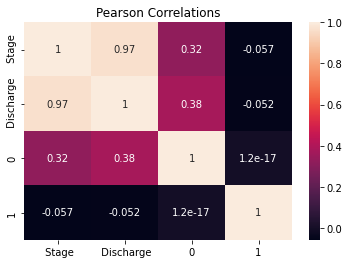

In [ ]:
result = pd.concat([df_stage, df_discharge, df_new_rbt_pca], axis=1)
ax = sns.heatmap(result.corr(), annot=True).set(title='Pearson Correlations');

In [ ]:
robustScaledVariablesPCA = {"Stage": RunModels(df_new_rbt_pca, df_stage),
                            "Discharge": RunModels(df_new_rbt_pca, df_discharge)
                           }

### Models with MinMax scaled variables:

#### MinMax scaled variables

In [ ]:
minMaxScaledVariables = {"Stage": RunModels(df_new_mmx, df_stage),
                         "Discharge": RunModels(df_new_mmx, df_discharge)
                        }

#### PCA chosen variables

Text(0.5, 1.0, 'Components Number vs Explained Variance Percentage')

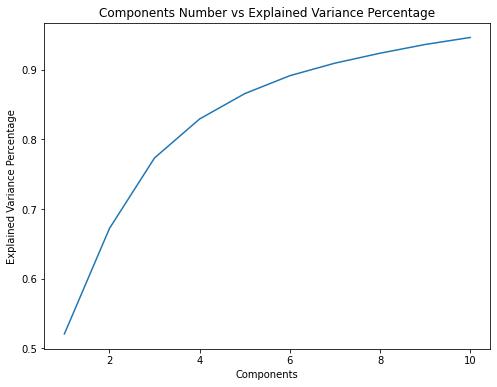

In [ ]:
pca = PCA(n_components = 10)
pca.fit(df_new_mmx)

#print("Components:")
#print(pca.components_)
#print("Explained Variance:")
#print(pca.explained_variance_)
#print("Explained Variance Percentage:")
#print(pca.explained_variance_ratio_) 

# Plot cumulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
#print("Cumulative explained variance:\n", cumulative_variance)

plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, 11, 1), cumulative_variance)
plt.xlabel("Components")
plt.ylabel("Explained Variance Percentage")
plt.title("Components Number vs Explained Variance Percentage")

In [ ]:
# Choose a components number
pca = PCA(n_components = 7)
pca.fit(df_new_mmx)

scores = pca.transform(df_new_mmx)
#print("New Variables (with pca):\n", scores)
df_new_mmx_pca = pd.DataFrame(scores)

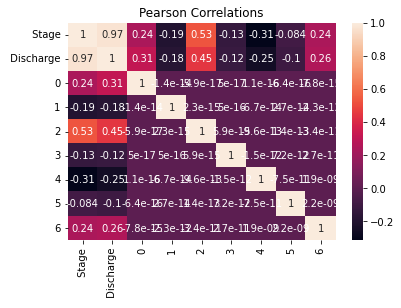

In [ ]:
result = pd.concat([df_stage, df_discharge, df_new_mmx_pca], axis=1)
ax = sns.heatmap(result.corr(), annot=True).set(title='Pearson Correlations');

In [ ]:
minMaxScaledVariablesPCA = {"Stage": RunModels(df_new_mmx_pca, df_stage),
                            "Discharge": RunModels(df_new_mmx_pca, df_discharge)
                           }

### Important data visualization

In [ ]:
data = {"Data": {
                  "Paper Variables": paperVariables,
                  "Normal Variables": normalVariables,
                  "Normal Variables with PCA": normalVariablesPCA,
                  "Standard Scaled Variables": standardScaledVariables,
                  "Standard Scaled Variables with PCA": standardScaledVariablesPCA,
                  "Robust Scaled Variables": robustScaledVariables,
                  "Robust Scaled Variables with PCA": robustScaledVariablesPCA,
                  "MinMax Scaled Variables": minMaxScaledVariables,
                  "MinMax Scaled Variables with PCA": minMaxScaledVariablesPCA
                }
        }

In [ ]:
data

{'Data': {'Paper Variables': {'Stage': {'MLP Model': {'Test': {'MAE': 0.6391770558262598,
      'MSE': 0.650284945282566,
      'RMSE': 0.8064024710295511,
      'R^2': -0.0012780026552117185,
      'Standard Error': 0.8070523271616121,
      'Y test':         Stage
      12797    5.11
      20461    2.54
      24710    4.65
      34212    3.12
      8390     3.13
      ...       ...
      26769    3.30
      37189    2.17
      16342    2.29
      39977    3.77
      35634    2.36
      
      [29442 rows x 1 columns],
      'Y test predicted':               0
      0      2.879291
      1      2.869311
      2      2.870592
      3      2.866904
      4      2.860845
      ...         ...
      29437  2.865434
      29438  2.872799
      29439  2.871629
      29440  2.879285
      29441  2.878229
      
      [29442 rows x 1 columns]}},
    'Random Forest Model': {'Test': {'MAE': 0.16055699341077376,
      'MSE': 0.10199834895727193,
      'RMSE': 0.3193718036353114,
      'R^2': 0.8

In [ ]:
import json

# as requested in comment

with open('results/csv/dict.txt', 'w') as file:
     file.write(str(data))

In [ ]:
typeOfData = ["Normal Variables", "Normal Variables with PCA", "Standard Scaled Variables", "Standard Scaled Variables with PCA", "Robust Scaled Variables", "Robust Scaled Variables with PCA", "MinMax Scaled Variables", "MinMax Scaled Variables with PCA"]
dependentVariables = ["Stage", "Discharge"]
models = ["MLP Model", "Random Forest Model", "SVR Model"]
typeOfEvaluation = ["Test", "Validation"]
metric = ["MAE", "MSE", "RMSE", "R^2", "Standard Error"]

y_test = ["Y test", "Y test predicted"]
y_val = ["Y validation", "Y validation predicted"]

metricResults = []
for i in typeOfData:
  for j in dependentVariables:
    for k in models:
          metricResults.append([
                    "Paper Variables", 
                    j, 
                    k, 
                    "Test",
                    round(data["Data"]["Paper Variables"][j][k]["Test"]["MAE"], 3),
                    round(data["Data"]["Paper Variables"][j][k]["Test"]["MSE"], 3),
                    round(data["Data"]["Paper Variables"][j][k]["Test"]["RMSE"], 3),
                    round(data["Data"]["Paper Variables"][j][k]["Test"]["R^2"], 3),
                    round(data["Data"]["Paper Variables"][j][k]["Test"]["Standard Error"], 3)
          ])
for i in typeOfData:
  for j in dependentVariables:
    for k in models:
      for l in typeOfEvaluation:
          metricResults.append([
                    i, 
                    j, 
                    k, 
                    l,
                    round(data["Data"][i][j][k][l]["MAE"], 3),
                    round(data["Data"][i][j][k][l]["MSE"], 3),
                    round(data["Data"][i][j][k][l]["RMSE"], 3),
                    round(data["Data"][i][j][k][l]["R^2"], 3),
                    round(data["Data"][i][j][k][l]["Standard Error"], 3)
          ])

In [ ]:
df_mr = pd.DataFrame(metricResults, columns=["Type Of Data", "Stage/Discharge", "Model", "Test/Validation", "MAE", "MSE", "RMSE", "R^2", "Standard Error"])
for k in models:
  for j in dependentVariables:
    df_mr_val = df_mr[df_mr["Test/Validation"] == "Validation"]
    df_mr_val_model = df_mr_val[df_mr_val["Model"] == k]
    df_mr_val_model = df_mr_val_model[df_mr_val_model["Stage/Discharge"] == j]
    df_mr_val_model = df_mr_val_model.drop(columns = ['Test/Validation', 'Model', 'Stage/Discharge'])
    df_mr_val_model.T.to_csv("results/csv/" + j + ' ' + k + '.csv', header=False)
    print(j + ' ' + k)
    display(df_mr_val_model)

Stage MLP Model


Type Of Data    MAE    MSE   RMSE    R^2  \
49                     Normal Variables  0.638  0.639  0.799 -0.001   
61            Normal Variables with PCA  0.631  0.773  0.879 -0.212   
73            Standard Scaled Variables  0.211  0.112  0.335  0.824   
85   Standard Scaled Variables with PCA  0.296  0.227  0.476  0.644   
97              Robust Scaled Variables  0.271  0.220  0.469  0.655   
109    Robust Scaled Variables with PCA  0.633  0.635  0.797  0.004   
121             MinMax Scaled Variables  0.237  0.142  0.377  0.777   
133    MinMax Scaled Variables with PCA  0.265  0.196  0.443  0.692   

     Standard Error  
49            0.802  
61            0.877  
73            0.336  
85            0.478  
97            0.464  
109           0.800  
121           0.376  
133           0.445

Discharge MLP Model


Type Of Data      MAE          MSE      RMSE  \
55                     Normal Variables  821.795  1383311.929  1176.143   
67            Normal Variables with PCA  678.002  1093322.927  1045.621   
79            Standard Scaled Variables  365.059   475835.195   689.808   
91   Standard Scaled Variables with PCA  940.685  2261749.889  1503.912   
103             Robust Scaled Variables  362.850   459946.716   678.194   
115    Robust Scaled Variables with PCA  939.757  2259791.988  1503.260   
127             MinMax Scaled Variables  438.588   558835.307   747.553   
139    MinMax Scaled Variables with PCA  940.688  2261749.761  1503.911   

       R^2  Standard Error  
55  -0.001        1178.819  
67   0.209        1046.412  
79   0.656         691.740  
91  -0.637        1179.035  
103  0.667         679.539  
115 -0.636        1179.039  
127  0.595         746.600  
139 -0.637        1179.039

Stage Random Forest Model


Type Of Data    MAE    MSE   RMSE    R^2  \
51                     Normal Variables  0.140  0.080  0.283  0.874   
63            Normal Variables with PCA  0.408  0.360  0.600  0.435   
75            Standard Scaled Variables  0.140  0.080  0.284  0.874   
87   Standard Scaled Variables with PCA  0.234  0.169  0.411  0.735   
99              Robust Scaled Variables  0.140  0.080  0.284  0.874   
111    Robust Scaled Variables with PCA  0.418  0.407  0.638  0.361   
123             MinMax Scaled Variables  0.140  0.080  0.283  0.874   
135    MinMax Scaled Variables with PCA  0.210  0.141  0.375  0.779   

     Standard Error  
51            0.284  
63            0.602  
75            0.284  
87            0.412  
99            0.285  
111           0.640  
123           0.284  
135           0.376

Discharge Random Forest Model


Type Of Data      MAE         MSE     RMSE    R^2  \
57                     Normal Variables  203.481  233258.040  482.968  0.831   
69            Normal Variables with PCA  540.987  820620.085  905.881  0.406   
81            Standard Scaled Variables  203.365  233030.754  482.733  0.831   
93   Standard Scaled Variables with PCA  328.002  450925.772  671.510  0.674   
105             Robust Scaled Variables  203.346  232971.927  482.672  0.831   
117    Robust Scaled Variables with PCA  549.581  912066.012  955.021  0.340   
129             MinMax Scaled Variables  203.430  233294.115  483.005  0.831   
141    MinMax Scaled Variables with PCA  295.010  403544.252  635.251  0.708   

     Standard Error  
57          484.288  
69          908.206  
81          484.048  
93          673.313  
105         483.986  
117         957.622  
129         484.329  
141         637.103

Stage SVR Model


Type Of Data    MAE    MSE   RMSE    R^2  \
53                     Normal Variables  0.172  0.086  0.294  0.864   
65            Normal Variables with PCA  0.458  0.461  0.679  0.277   
77            Standard Scaled Variables  0.172  0.086  0.294  0.864   
89   Standard Scaled Variables with PCA  0.256  0.185  0.430  0.710   
101             Robust Scaled Variables  0.172  0.086  0.294  0.864   
113    Robust Scaled Variables with PCA  0.596  0.592  0.770  0.071   
125             MinMax Scaled Variables  0.172  0.086  0.294  0.864   
137    MinMax Scaled Variables with PCA  0.231  0.161  0.402  0.747   

     Standard Error  
53            0.295  
65            0.677  
77            0.295  
89            0.430  
101           0.295  
113           0.757  
125           0.295  
137           0.402

Discharge SVR Model


Type Of Data      MAE          MSE      RMSE  \
59                     Normal Variables  496.400  1069794.830  1034.309   
71            Normal Variables with PCA  631.762  1249238.979  1117.694   
83            Standard Scaled Variables  496.400  1069794.830  1034.309   
95   Standard Scaled Variables with PCA  489.712  1047283.417  1023.369   
107             Robust Scaled Variables  496.400  1069794.830  1034.309   
119    Robust Scaled Variables with PCA  751.152  1515365.725  1231.002   
131             MinMax Scaled Variables  496.400  1069794.830  1034.309   
143    MinMax Scaled Variables with PCA  476.003   999011.140   999.505   

       R^2  Standard Error  
59   0.226         995.413  
71   0.096        1071.320  
83   0.226         995.413  
95   0.242         990.208  
107  0.226         995.413  
119 -0.097        1125.931  
131  0.226         995.413  
143  0.277         969.637

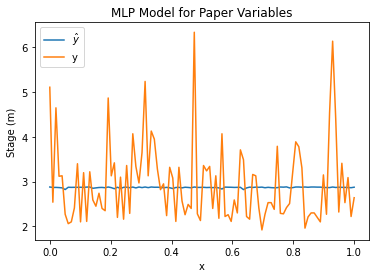

<Figure size 432x288 with 0 Axes>

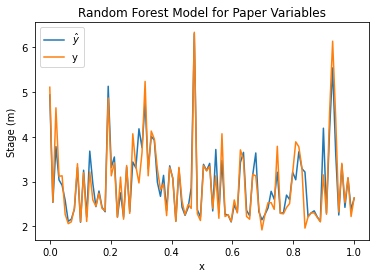

<Figure size 432x288 with 0 Axes>

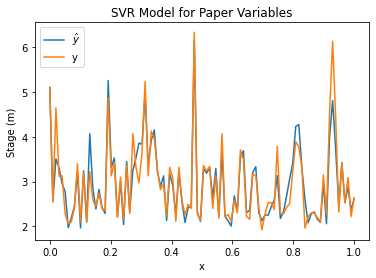

<Figure size 432x288 with 0 Axes>

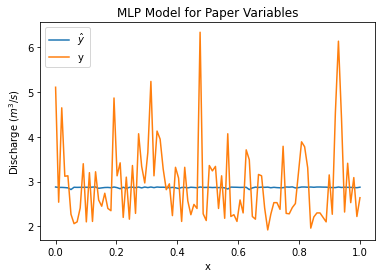

<Figure size 432x288 with 0 Axes>

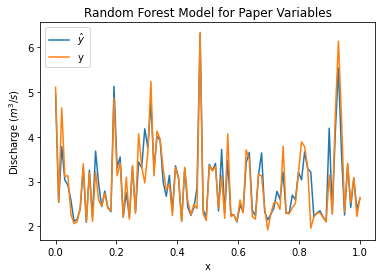

<Figure size 432x288 with 0 Axes>

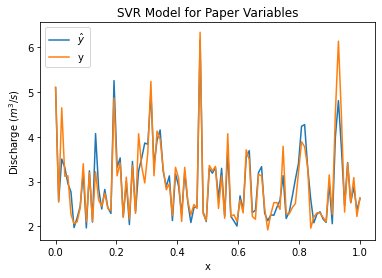

<Figure size 432x288 with 0 Axes>

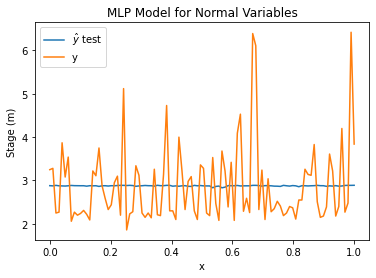

<Figure size 432x288 with 0 Axes>

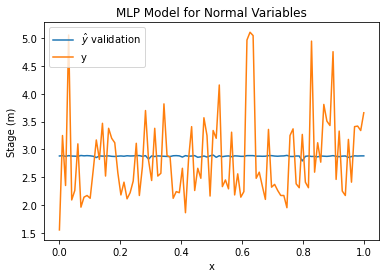

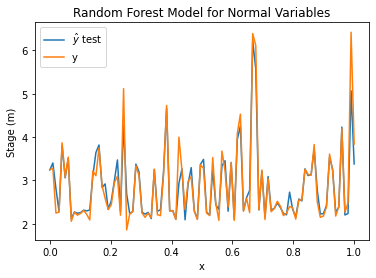

<Figure size 432x288 with 0 Axes>

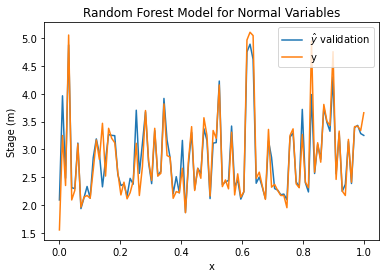

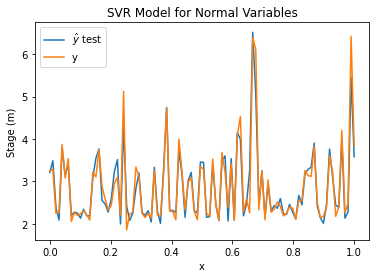

<Figure size 432x288 with 0 Axes>

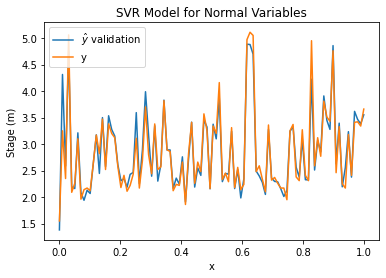

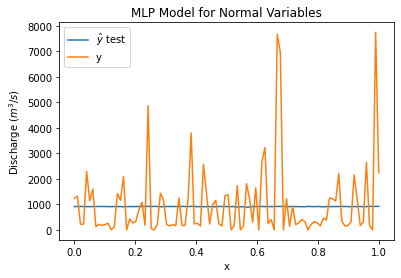

<Figure size 432x288 with 0 Axes>

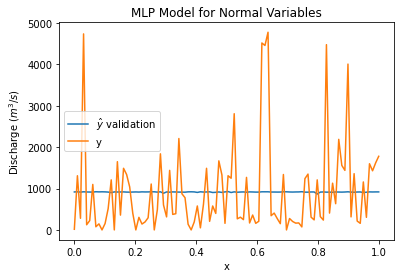

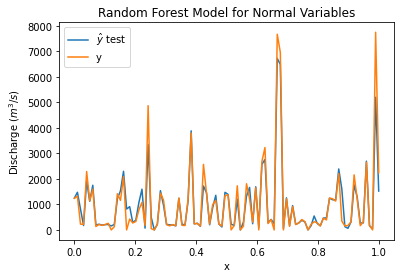

<Figure size 432x288 with 0 Axes>

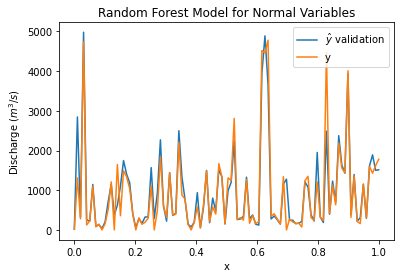

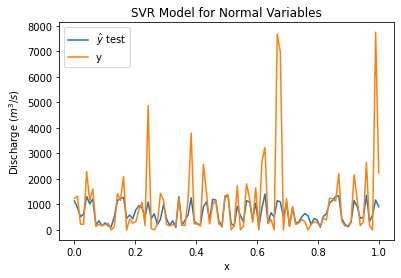

<Figure size 432x288 with 0 Axes>

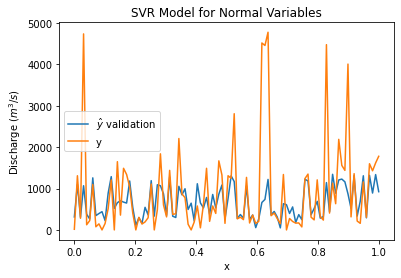

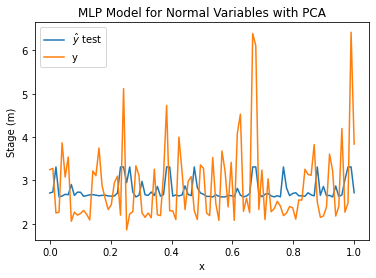

<Figure size 432x288 with 0 Axes>

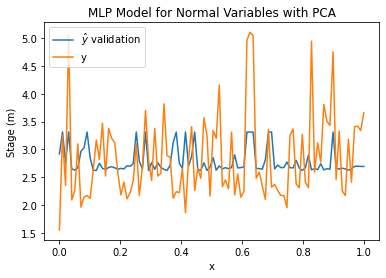

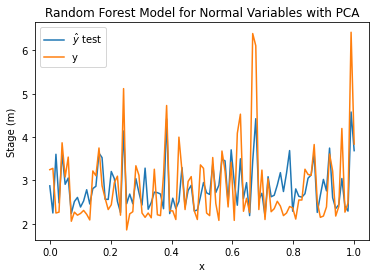

<Figure size 432x288 with 0 Axes>

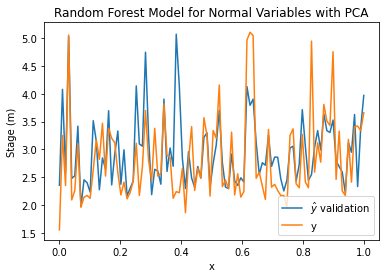

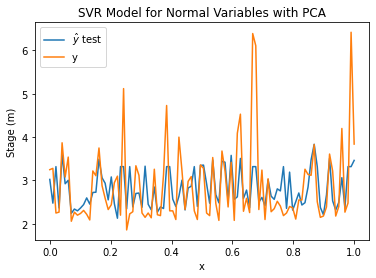

<Figure size 432x288 with 0 Axes>

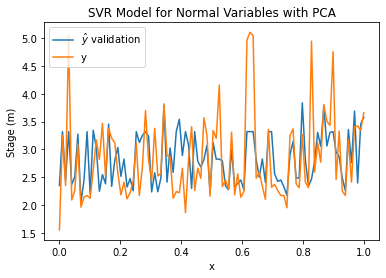

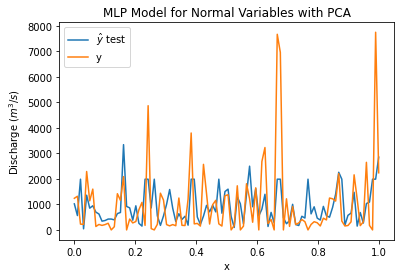

<Figure size 432x288 with 0 Axes>

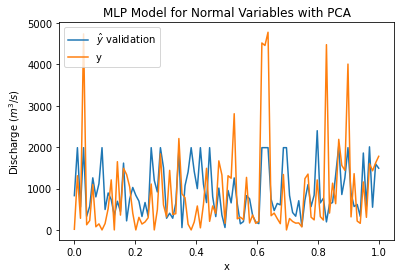

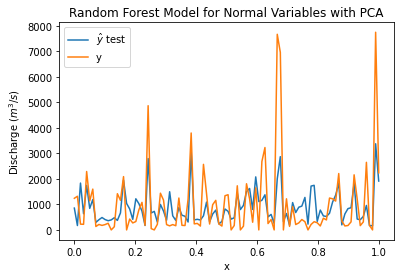

<Figure size 432x288 with 0 Axes>

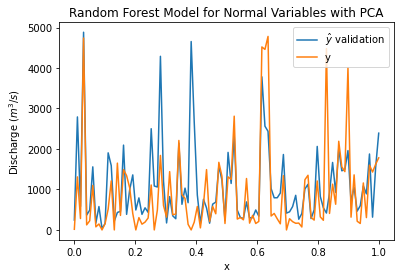

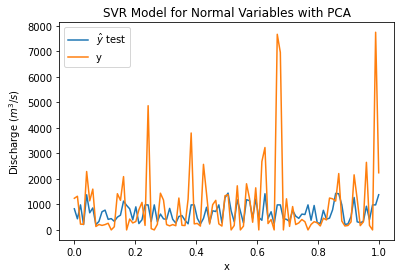

<Figure size 432x288 with 0 Axes>

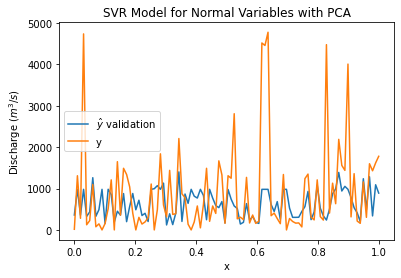

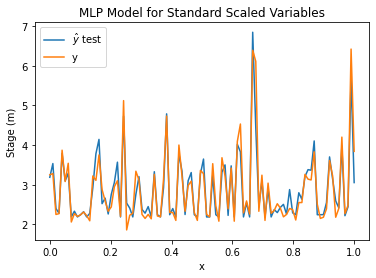

<Figure size 432x288 with 0 Axes>

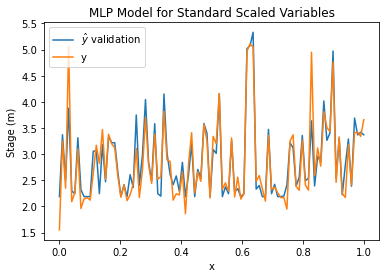

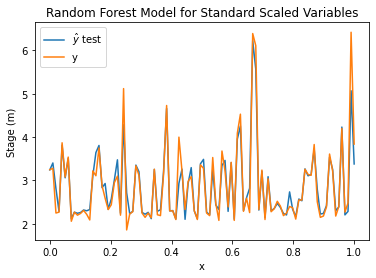

<Figure size 432x288 with 0 Axes>

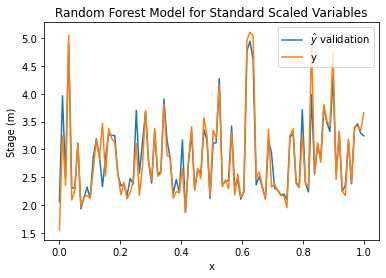

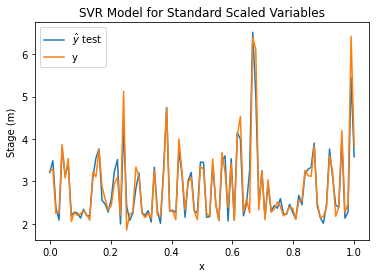

<Figure size 432x288 with 0 Axes>

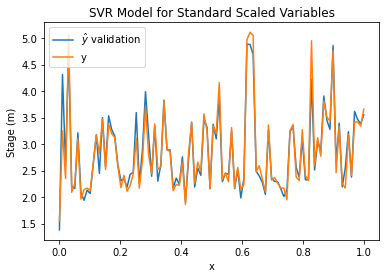

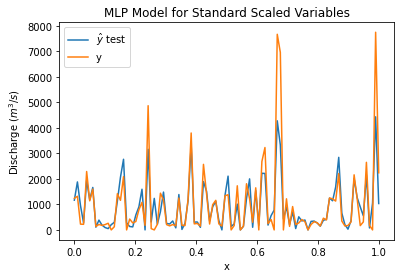

<Figure size 432x288 with 0 Axes>

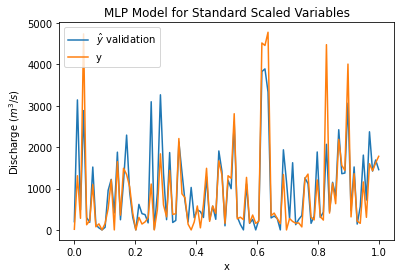

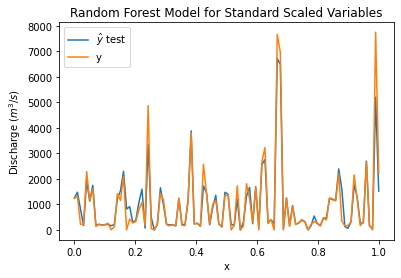

<Figure size 432x288 with 0 Axes>

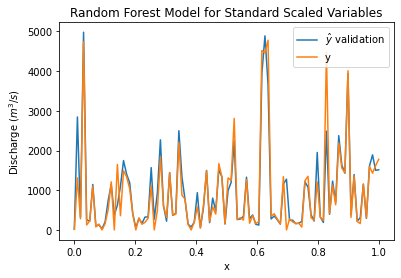

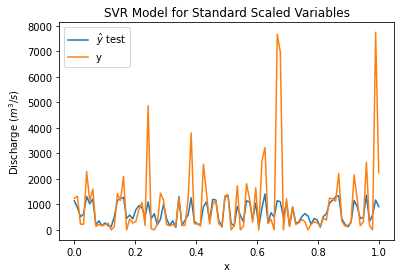

<Figure size 432x288 with 0 Axes>

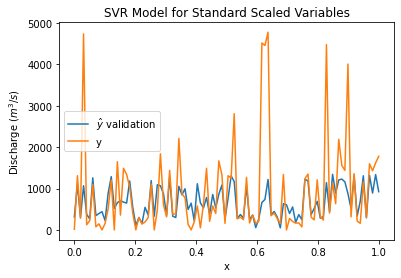

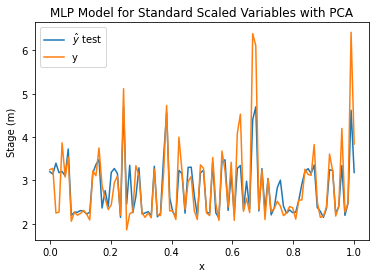

<Figure size 432x288 with 0 Axes>

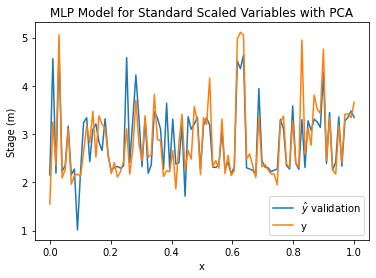

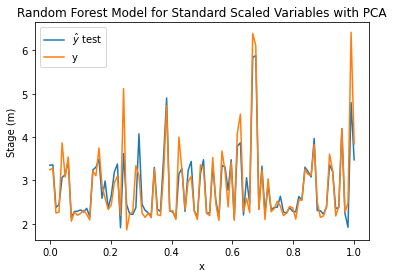

<Figure size 432x288 with 0 Axes>

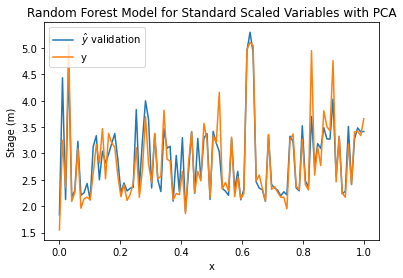

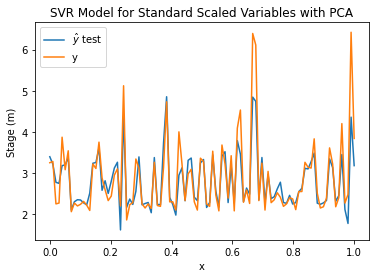

<Figure size 432x288 with 0 Axes>

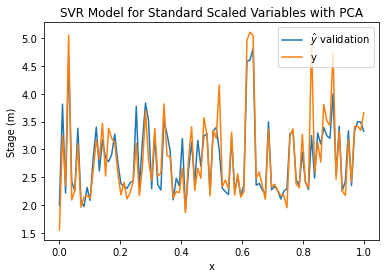

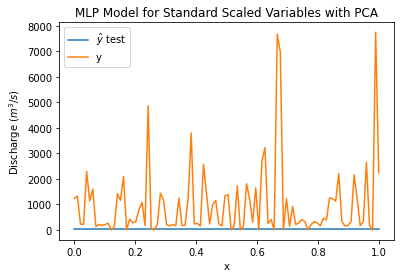

<Figure size 432x288 with 0 Axes>

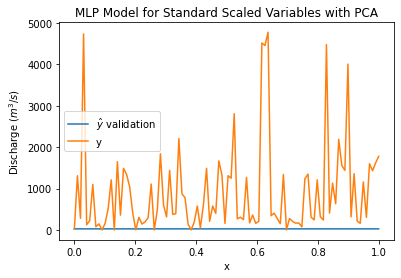

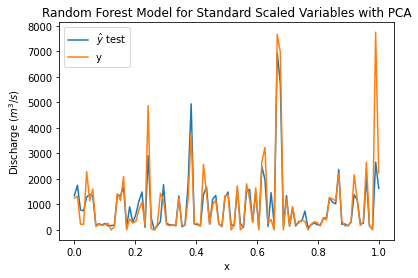

<Figure size 432x288 with 0 Axes>

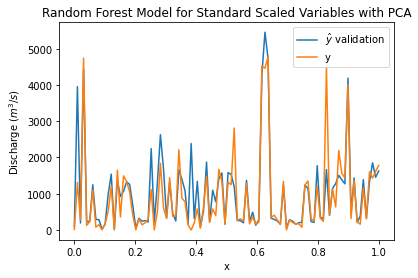

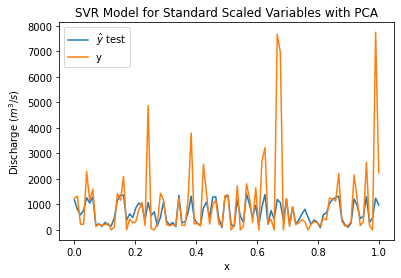

<Figure size 432x288 with 0 Axes>

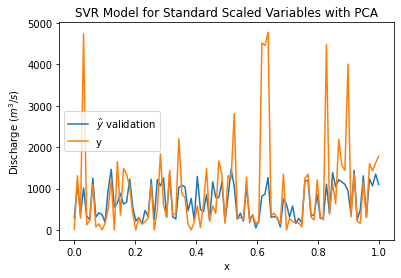

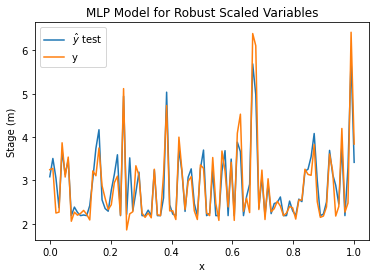

<Figure size 432x288 with 0 Axes>

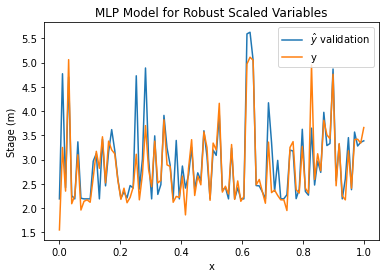

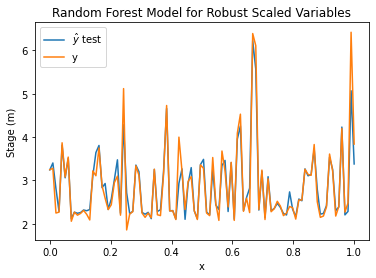

<Figure size 432x288 with 0 Axes>

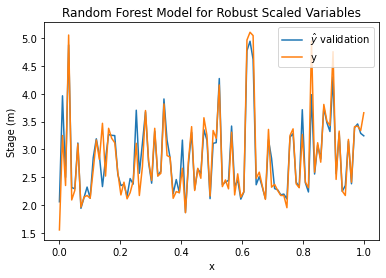

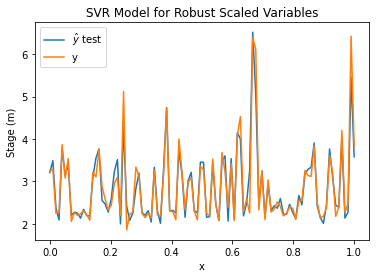

<Figure size 432x288 with 0 Axes>

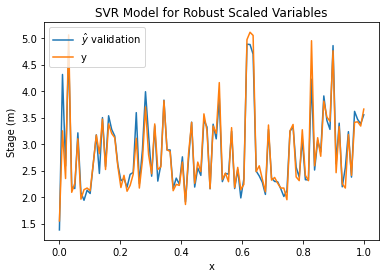

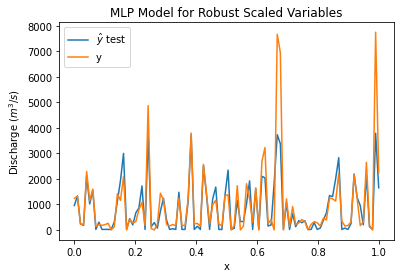

<Figure size 432x288 with 0 Axes>

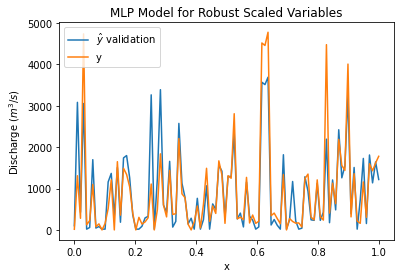

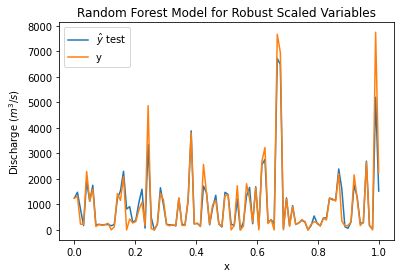

<Figure size 432x288 with 0 Axes>

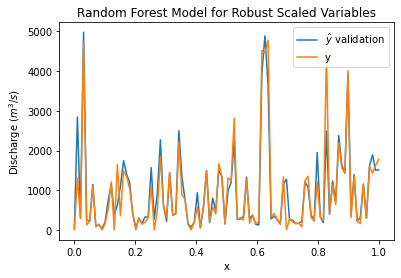

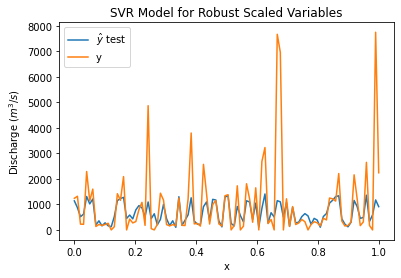

<Figure size 432x288 with 0 Axes>

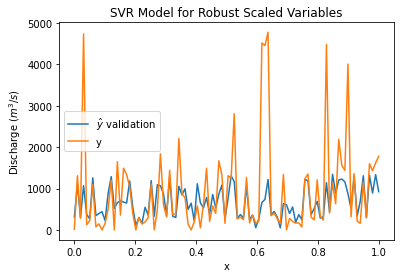

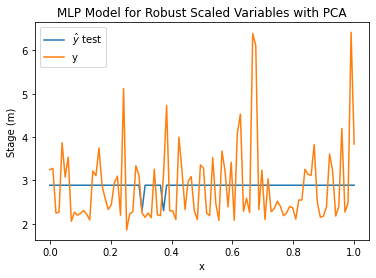

<Figure size 432x288 with 0 Axes>

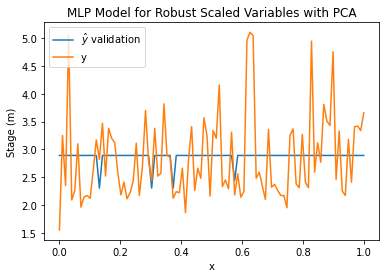

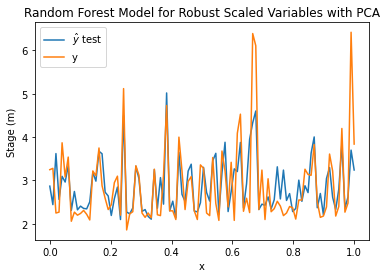

<Figure size 432x288 with 0 Axes>

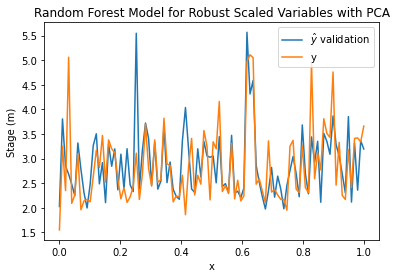

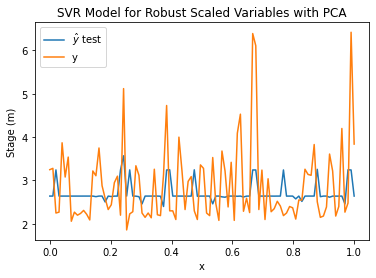

<Figure size 432x288 with 0 Axes>

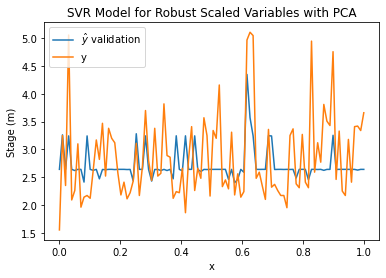

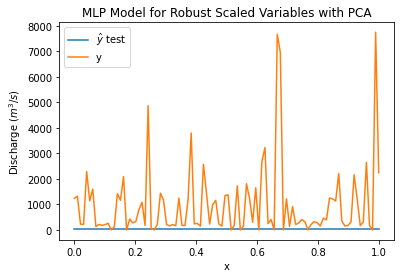

<Figure size 432x288 with 0 Axes>

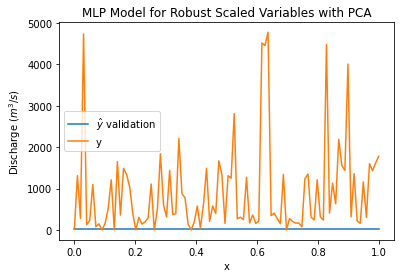

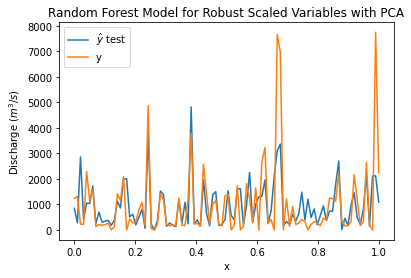

<Figure size 432x288 with 0 Axes>

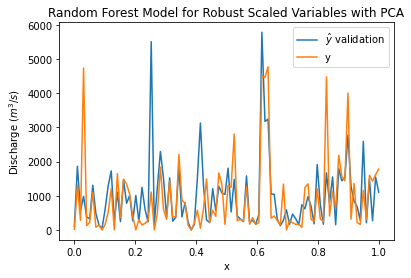

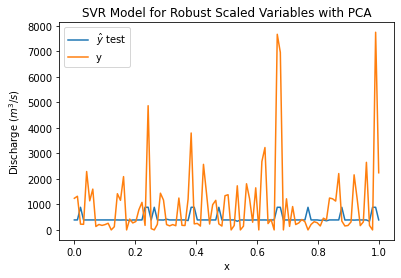

<Figure size 432x288 with 0 Axes>

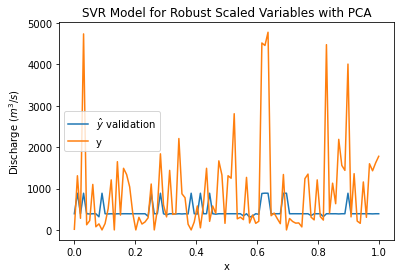

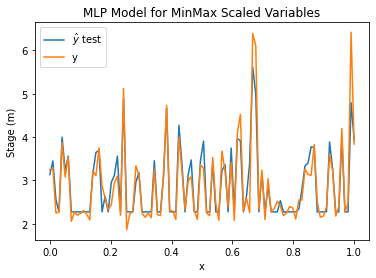

<Figure size 432x288 with 0 Axes>

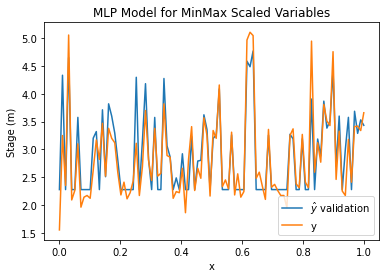

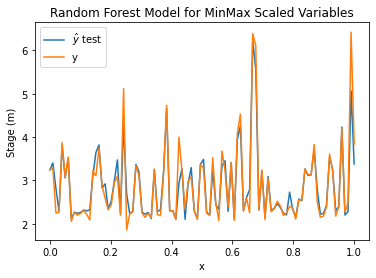

<Figure size 432x288 with 0 Axes>

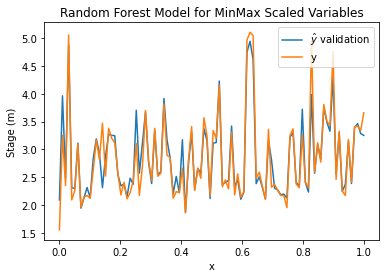

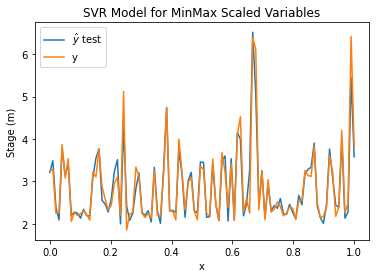

<Figure size 432x288 with 0 Axes>

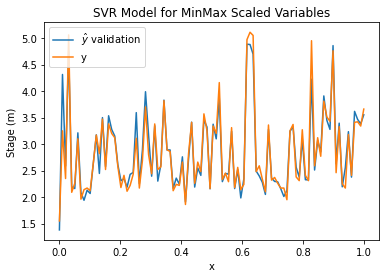

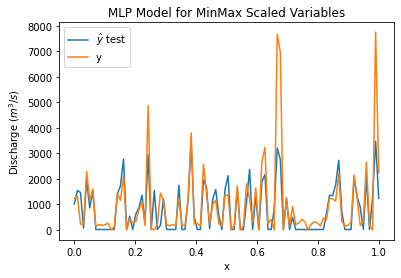

<Figure size 432x288 with 0 Axes>

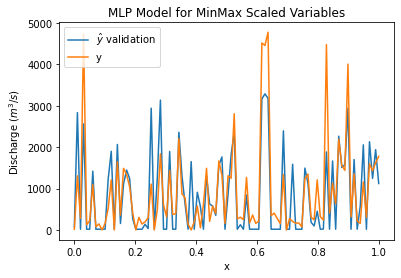

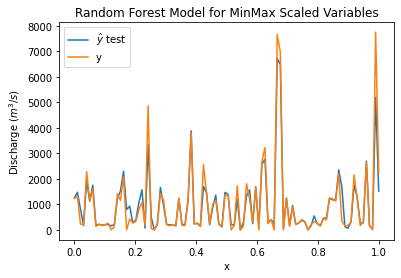

<Figure size 432x288 with 0 Axes>

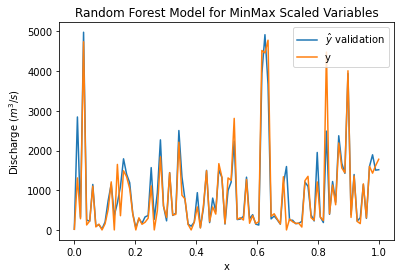

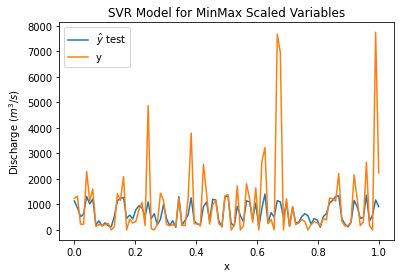

<Figure size 432x288 with 0 Axes>

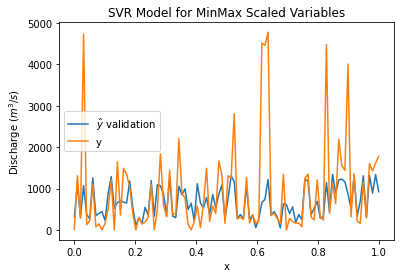

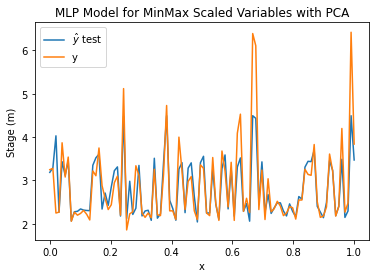

<Figure size 432x288 with 0 Axes>

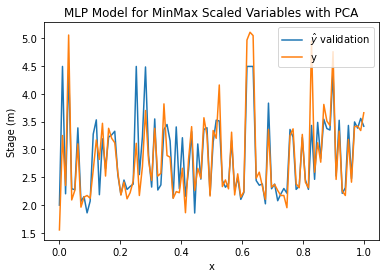

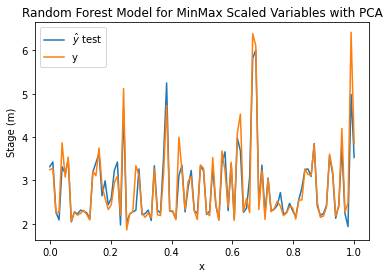

<Figure size 432x288 with 0 Axes>

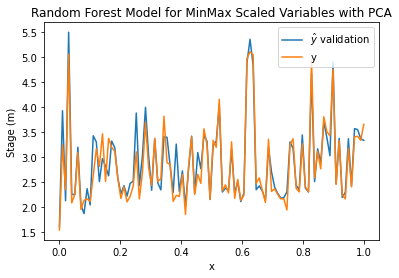

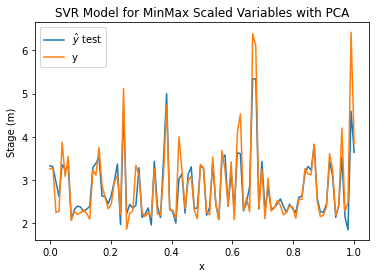

<Figure size 432x288 with 0 Axes>

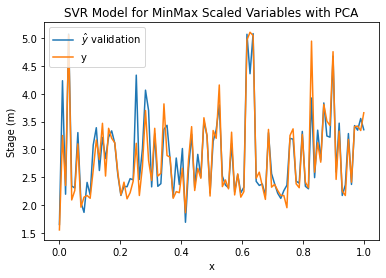

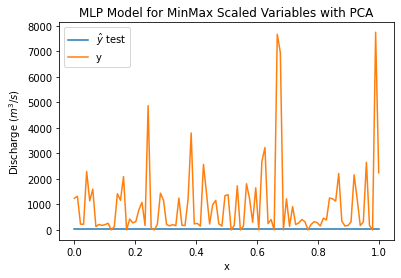

<Figure size 432x288 with 0 Axes>

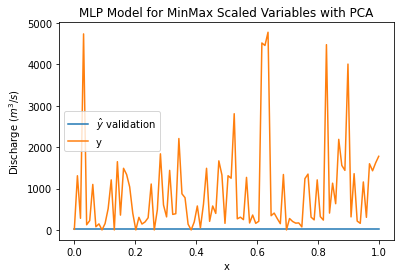

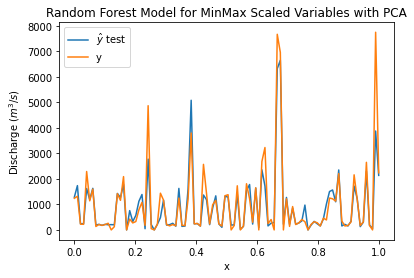

<Figure size 432x288 with 0 Axes>

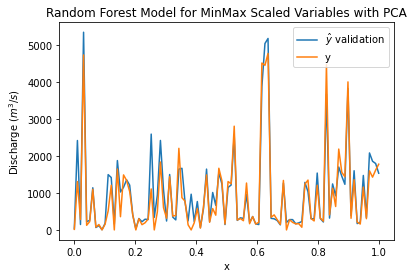

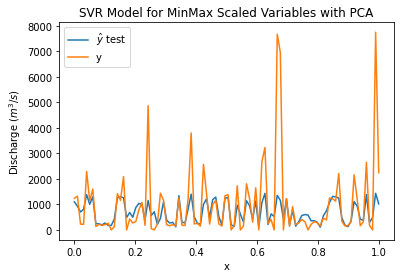

<Figure size 432x288 with 0 Axes>

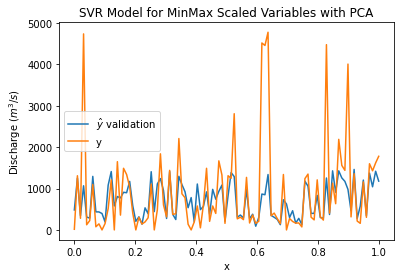

In [ ]:
X = np.linspace(0, 1, 100)
for j in dependentVariables:
  for k in models:
    fig, ax = plt.subplots()
    
    y1 = data["Data"]["Paper Variables"][j][k]["Test"]["Y test"]
    y2 = data["Data"]["Paper Variables"][j][k]["Test"]["Y test predicted"][0].to_numpy()
    
    ax.plot(X, y2[:100], X, y1[:100])
    ax.set_title( k + " for Paper Variables")
    ax.legend(["$\hat{y}$ ", "y"])
    ax.set_xlabel('x')
    if j == "Stage":
      ax.set_ylabel(j + " (m)")
    if j == "Discharge":
      ax.set_ylabel(j + " (${m}^3/s$)")
    plt.show()
    plt.savefig("results/images/paper/" +j + " " + k + " for Paper Variables" +'.png')

for i in typeOfData:
  for j in dependentVariables:
    for k in models:
      for l in typeOfEvaluation:

        if l == "Test":
          fig, ax = plt.subplots()

          y1 = data["Data"][i][j][k][l]["Y test"]
          y2 = data["Data"][i][j][k][l]["Y test predicted"][0].to_numpy()
          
          ax.plot(X, y2[:100], X, y1[:100])
          ax.set_title(k + " for " + i)
          ax.legend(["$\hat{y}$ test", "y"])
          ax.set_xlabel('x')
          if j == "Stage":
            ax.set_ylabel(j + " (m)")
          if j == "Discharge":
            ax.set_ylabel(j + " (${m}^3/s$)")
          plt.show()
          plt.savefig("results/images/test/" + j + " " + k + " for " + i +'.png')

        if l == "Validation":
          fig, ax = plt.subplots()
          
          y1 = data["Data"][i][j][k][l]["Y validation"]
          y2 = data["Data"][i][j][k][l]["Y validation predicted"][0].to_numpy()
          
          ax.plot(X, y2[:100], X, y1[:100])
          ax.set_title(k + " for " + i)
          ax.legend(["$\hat{y}$ validation", "y"])
          ax.set_xlabel('x')
          if j == "Stage":
            ax.set_ylabel(j + " (m)")
          if j == "Discharge":
            ax.set_ylabel(j + " (${m}^3/s$)")
          plt.savefig("results/images/validation/"+j + " " + k + " for " + i +'.png')
          plt.show()
          